#STATISTICS ANALYSIS

In [ ]:
import sys
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  
from matplotlib import pyplot as plt
import matplotlib as mp
import random
import io
from scipy import stats
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing
import matplotlib.lines as mlines
from functools import partialmethod 
from matplotlib import pyplot as plt
from datetime import datetime, timedelta


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# upload the data using GIT



url = 'https://raw.githubusercontent.com/segevstat/datalab/main/votes%20per%20ballot%202021.csv'
df_2021_ballot_raw = pd.read_csv(url,  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2021_ballot = df_2021_ballot_raw.drop('מעטפות חיצוניות')
df_2021_ballot = df_2021_ballot.drop('סמל ועדה', axis=1)
#############
url2= 'https://raw.githubusercontent.com/segevstat/datalab/main/votes%20per%20ballot%202020.csv'
df_2020_ballot_raw = pd.read_csv(url2,  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_ballot = df_2020_ballot_raw.drop('מעטפות חיצוניות')
df_2020_ballot = df_2020_ballot.drop('סמל ועדה', axis=1)
#############
url3='https://raw.githubusercontent.com/segevstat/datalab/main/eshkol_hevrati_calcali.csv'
df_socio= pd.read_csv(url3, encoding = 'iso-8859-8', index_col='name')
#############

parties_dict_2020 ={'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת", 'טב'  : "ימינה", 'נץ'  : "עוצמה יהודית",
'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "כחול לבן", 'שס'  : "שס"}

parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

parties_2021 = list(parties_dict_2021.values())
parties_2021A = list(parties_dict_2021.values())

df_2020_ballot_raw.rename(columns=parties_dict_2020, inplace=True)
df_2021_ballot_raw.rename(columns=parties_dict_2021, inplace=True)

parties_2021.append('קלפי')
parties_2021.append('בזב')
parties_2021.append('כשרים')
parties_2021.append('פסולים')

parties_2020 = list(parties_dict_2020.values())

parties_2020.append('קלפי')
parties_2020.append('בזב')
parties_2020.append('כשרים')
parties_2020.append('פסולים')

parties_2020 = list(parties_dict_2020.values())
parties_2020A = list(parties_dict_2020.values())


df_2020_ballot.rename(columns=parties_dict_2020, inplace=True)
df_2021_ballot.rename(columns=parties_dict_2021, inplace=True)

df_2020_ballot_new = df_2020_ballot[parties_2020]

df_2021_ballot_new = df_2021_ballot[parties_2021]
df_2021_ballot_newA = df_2021_ballot[parties_2021]

df_2020_ballot_new=df_2020_ballot_new.iloc[1:len(df_2020_ballot_new.index), 0:13]
df_2021_ballot_new=df_2021_ballot_new.iloc[1:len(df_2021_ballot_new.index), 0:13]


## Question 1 - 2021 elections 




In [ ]:
def votes_precentage(df, thresh):
    par = df.sum().div(df.sum().sum())
    return par[par > thresh]

def sampiling_vote(df, b, levels=1):
     return votes_precentage(df.sample(n=b), -0.1) 


In [ ]:
p = votes_precentage(df_2021_ballot_new, -0.1) 

parties_13_2021 = df_2021_ballot_new.iloc[:, np.where(p>0.0325)[0]]


In [ ]:
def sim_of_elections(midgam_func, df, thresh, iters=50, b=7, levels = np.zeros(1)): #b=7
    p = votes_precentage(df, -0.1)
    p_hat = np.zeros((iters, df.shape[1]))
    for i in range(iters):
        p_hat[i,] = midgam_func(df, b, levels)    
    bias = p_hat.mean(axis=0) - p
    variance = p_hat.var(axis=0)
    std = np.sqrt(variance)
    mse = bias**2 + variance
    mean = p_hat.mean(axis = 0)
    p_hat= p_hat
    return bias, variance, std, mse , mean ,p_hat

dim = parties_13_2021.shape[1]
iter= 100


ballot_seven = list(range(7, 100, 7))

###################################
std_mat = np.zeros((len(ballot_seven), dim))
bias_mat = np.zeros((len(ballot_seven), dim))
mse_mat = np.zeros((len(ballot_seven), dim))
mean_mat = np.zeros((len(ballot_seven), dim))
var_mat= np.zeros((len(ballot_seven), dim))
###################################
i=0
for b in ballot_seven:
    bias, variance, std, mse ,mean , p_hat = sim_of_elections(sampiling_vote, parties_13_2021, 0.0325, 100, 7)
    std_mat[i,] = std
    bias_mat[i,] = bias
    mse_mat[i, ] = mse
    mean_mat[i,] = mean
    i += 1




In [ ]:
ans1 = pd.DataFrame([mean_mat[0,], std_mat[0,], bias_mat[0,], mse_mat[0,]],columns=parties_dict_2021.values(), index = ['MEAN','STD', 'BIAS','MSE'])
ans1

,עבודה,מרצ,יהדות התורה,רעם,תקוה חדשה,הרשימה המשותפת,ימינה,הציונות הדתית,ישראל ביתנו,הליכוד,יש עתיד,כחול לבן,שס
MEAN,0.058212,0.046682,0.063943,0.036035,0.046397,0.053739,0.058875,0.054663,0.058384,0.242731,0.138593,0.065961,0.075785
STD,0.026680,0.024841,0.075588,0.040225,0.011073,0.056587,0.021049,0.041855,0.023961,0.060930,0.044188,0.021776,0.040532
BIAS,-0.001433,0.000436,0.004254,-0.004781,-0.001196,0.002504,-0.000691,0.004162,0.002191,-0.002475,-0.002875,-0.001584,0.001488
MSE,0.000714,0.000617,0.005732,0.001641,0.000124,0.003208,0.000444,0.001769,0.000579,0.003719,0.001961,0.000477,0.001645


ניתן לראות כי וקטור ההטיה באורך 13 מכיל ערכים קטנים מאוד השואפים ל0 מימין ומשמאל, בהתאם לתיאוריה


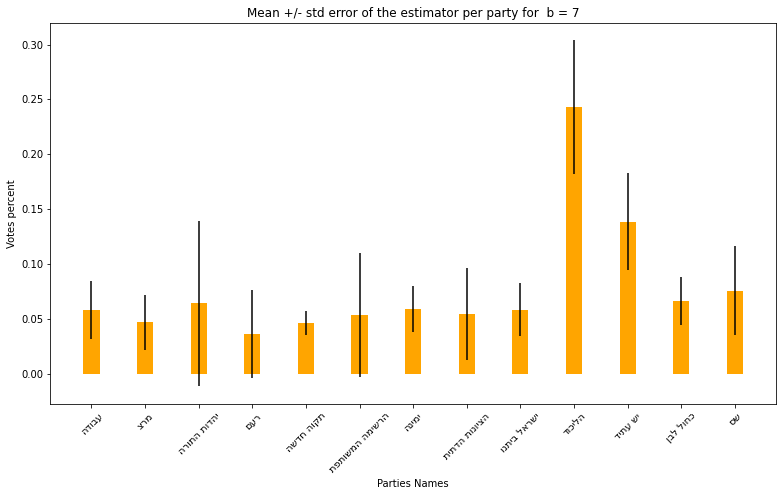

In [ ]:
b = 0 # 7
fig, ax = plt.subplots(figsize=(13,7))

width = 0.3

p_real = votes_precentage(parties_13_2021,0)
mean_ofq1 = ax.bar(np.arange(dim), mean_mat[b,], width=width, yerr=std_mat[b,], color = "orange") 
ax.set_xticks(np.arange(dim))
ax.set_xticklabels(p.keys())
ax.set_ylabel('Votes percent')
ax.set_xlabel('Parties Names')
ax.set_title('Mean +/- std error of the estimator per party for  b = 7')
ax.set_xticks(np.arange(dim))
ax.set_xticklabels([n[::-1] for n in parties_dict_2021.values()])
plt.xticks(rotation=45)
plt.show()



In [ ]:
m=df_2021_ballot["מצביעים"].sample(1)[0]
var_pj = (p * (1-p) / (m* ballot_seven[0]))
var_sample=(std_mat[0,]**2)

table_var = pd.DataFrame([var_sample, var_pj], columns=parties_dict_2021.values(), index = ['Var sample', 'Var of pj hat'])
table_var

,עבודה,מרצ,יהדות התורה,רעם,תקוה חדשה,הרשימה המשותפת,ימינה,הציונות הדתית,ישראל ביתנו,הליכוד,יש עתיד,כחול לבן,שס
Var sample,0.000712,0.000617,0.005713,0.001618,0.000123,0.003202,0.000443,0.001752,0.000574,0.003713,0.001953,0.000474,0.001643
Var of pj hat,0.000030,0.000024,0.000030,0.000021,0.000024,0.000026,0.000030,0.000026,0.000028,0.000099,0.000065,0.000034,0.000037


מרצ, תקווה חדשה, הרשימה המשותפת, הציונות הדתית, ישראל ביתנו,יהדות התורה העבודה וימינה קיבלו 6/7 מנדטים בבחירות.
לפי הטבלה ניתן לראות כי השונויות שונות בהינתן הדגימה האקראית של כמות הבוחרים



מקור:
https://votes24.bechirot.gov.il/

 

In [ ]:
m_random = []
for i in range(100000):
  m_random.append(df_2021_ballot["מצביעים"].sample(1)[0])

m_random_mean=pd.DataFrame([m_random]).mean(axis=1).mean()

var_pj_2 = (p * (1-p) / (m_random_mean* ballot_seven[0]))
var_sample=(std_mat[0,]**2)

pd.DataFrame([var_sample, var_pj_2], columns=parties_dict_2021.values(),index = ['Var sample 2', 'Var of pj hat2'])



,עבודה,מרצ,יהדות התורה,רעם,תקוה חדשה,הרשימה המשותפת,ימינה,הציונות הדתית,ישראל ביתנו,הליכוד,יש עתיד,כחול לבן,שס
Var sample 2,0.000712,0.000617,0.005713,0.001618,0.000123,0.003202,0.000443,0.001752,0.000574,0.003713,0.001953,0.000474,0.001643
Var of pj hat2,0.000024,0.000019,0.000024,0.000017,0.000020,0.000021,0.000024,0.000021,0.000023,0.000080,0.000052,0.000027,0.000030


מבדיקה נוספת של השונויות, כאשר את כמות הבוחרים דגמנו מתוך 100,000 דגימות, נראה כי היחס נשמר עבור ממוצע הבוחרים למול הדגימה שבוצעה מעלה.




## Question 2





In [ ]:
# merging ballots with eshkolot using only 13 parties
parties_2021A.append('בזב')
merged_df = df_2021_ballot[parties_2021A].join(df_socio.iloc[:,[3]])
merged_df = merged_df.dropna()
merged_df['eco_level'] = merged_df['eco_level'].apply(np.int64)
parties_2021A.remove('בזב')
merged_df.head()

,עבודה,מרצ,יהדות התורה,רעם,תקוה חדשה,הרשימה המשותפת,ימינה,הציונות הדתית,ישראל ביתנו,הליכוד,יש עתיד,כחול לבן,שס,בזב,eco_level
אבו גוש,1,13,1,44,0,127,0,0,1,28,3,0,1,621,3
אבו גוש,2,8,0,40,1,110,0,0,1,76,3,2,3,621,3
אבו גוש,3,7,0,43,0,106,0,0,1,62,5,2,0,620,3
אבו גוש,3,8,0,37,0,98,0,0,0,81,4,2,5,602,3
אבו גוש,0,4,1,23,0,124,0,1,1,15,8,0,1,492,3


In [ ]:
# finding the size of each eshkol
size = dict()
for i in range(1,11):
  size[i] = merged_df.loc[(merged_df['eco_level'] == i)].loc[:,'בזב'].sum()

# finding the 7 biggest eshkolot
largest = list()
for i in range(7):
  largest += [max(size,key=size.get)]
  size.pop(max(size,key=size.get))

In [ ]:
# midgam from largest 7
def midgam(df):
  midgam = pd.DataFrame()
  for l in largest:
    midgam = midgam.append(df.loc[(df['eco_level'] == l)].sample())
  midgam = midgam.drop(labels=['בזב','eco_level'],axis=1)
  return midgam

In [ ]:
x = midgam(merged_df)
x

,עבודה,מרצ,יהדות התורה,רעם,תקוה חדשה,הרשימה המשותפת,ימינה,הציונות הדתית,ישראל ביתנו,הליכוד,יש עתיד,כחול לבן,שס
נבטים,16,2,0,7,20,0,48,24,1,95,35,29,8
בענה,1,1,0,69,1,112,1,0,0,2,0,1,1
בת ים,8,5,0,0,8,0,9,0,24,70,25,13,6
כפר סבא,44,48,1,0,31,0,18,6,7,43,137,68,2
אור יהודה,14,7,5,0,21,0,16,27,0,225,12,18,55
ירכא,2,11,0,0,3,29,2,0,111,44,27,3,10
כפר קרע,0,15,0,81,0,182,0,0,0,9,2,1,11


In [ ]:
# calculating pj_hat for 100 simulations
pj_hat = pd.DataFrame()
for i in range (100):
  x = midgam(merged_df)
  x = x.sum().div(x.sum().sum())
  pj_hat = pj_hat.append(x, ignore_index=True)

pj_hat.head()

,הליכוד,הציונות הדתית,הרשימה המשותפת,יהדות התורה,ימינה,יש עתיד,ישראל ביתנו,כחול לבן,מרצ,עבודה,רעם,שס,תקוה חדשה
0,0.357302,0.050469,0.081733,0.007593,0.063868,0.096472,0.042876,0.053595,0.025458,0.030817,0.028584,0.104064,0.057168
1,0.307885,0.080935,0.051731,0.008344,0.124322,0.088027,0.044639,0.043388,0.015019,0.030038,0.045891,0.106383,0.053400
2,0.306723,0.038340,0.097689,0.001050,0.059349,0.137080,0.061450,0.066702,0.028361,0.054622,0.024685,0.067752,0.056197
3,0.225734,0.032054,0.142212,0.005418,0.039729,0.130926,0.101129,0.051016,0.041535,0.029345,0.097065,0.059594,0.044244
4,0.171939,0.031122,0.121939,0.009694,0.053571,0.175000,0.108163,0.059694,0.078061,0.067347,0.032653,0.027551,0.063265


In [ ]:
# rearrange order of columns
pj_hat = pj_hat[parties_2021A]
pj_hat.head()

,עבודה,מרצ,יהדות התורה,רעם,תקוה חדשה,הרשימה המשותפת,ימינה,הציונות הדתית,ישראל ביתנו,הליכוד,יש עתיד,כחול לבן,שס
0,0.030817,0.025458,0.007593,0.028584,0.057168,0.081733,0.063868,0.050469,0.042876,0.357302,0.096472,0.053595,0.104064
1,0.030038,0.015019,0.008344,0.045891,0.053400,0.051731,0.124322,0.080935,0.044639,0.307885,0.088027,0.043388,0.106383
2,0.054622,0.028361,0.001050,0.024685,0.056197,0.097689,0.059349,0.038340,0.061450,0.306723,0.137080,0.066702,0.067752
3,0.029345,0.041535,0.005418,0.097065,0.044244,0.142212,0.039729,0.032054,0.101129,0.225734,0.130926,0.051016,0.059594
4,0.067347,0.078061,0.009694,0.032653,0.063265,0.121939,0.053571,0.031122,0.108163,0.171939,0.175000,0.059694,0.027551


In [ ]:
# table of bias, variance, MSE for the 13 big parties
# p = p = votes_precentage(df_2021_ballot[parties_2021A], 0.0325)
bias2 = pj_hat.mean(axis=0) - p
variance2 = pj_hat.var(axis=0)
std2 = np.sqrt(variance2)
mse2 = bias2**2 + variance2
mean2 = pj_hat.mean(axis = 0)


ans2 = pd.DataFrame([bias2, variance2, mse2],columns=parties_dict_2021.values(), index = [ 'Bias','Variance','MSE'])
ans2

,עבודה,מרצ,יהדות התורה,רעם,תקוה חדשה,הרשימה המשותפת,ימינה,הציונות הדתית,ישראל ביתנו,הליכוד,יש עתיד,כחול לבן,שס
Bias,-0.011251,-0.009557,0.003160,-0.000670,-0.001636,0.011750,0.001992,0.005168,0.005690,0.016613,-0.024285,-0.011153,0.014179
Variance,0.000416,0.000285,0.003435,0.001543,0.000126,0.002244,0.000672,0.001459,0.000623,0.003898,0.000857,0.000212,0.001322
MSE,0.000543,0.000376,0.003445,0.001544,0.000128,0.002382,0.000676,0.001486,0.000655,0.004174,0.001447,0.000336,0.001524


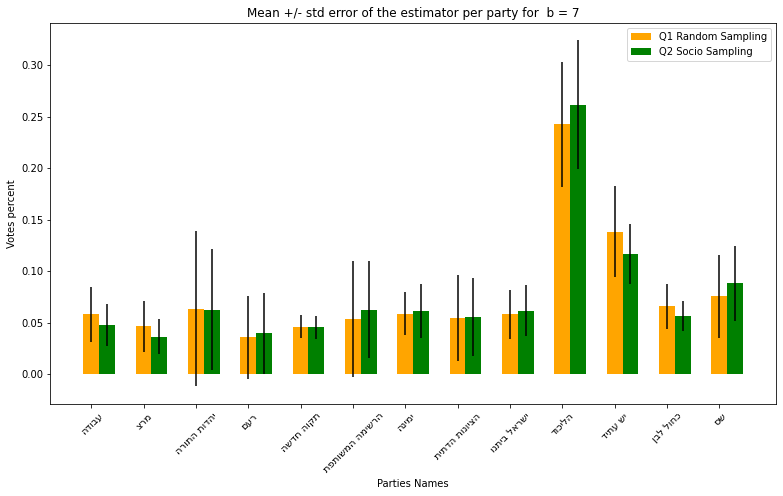

In [ ]:
# graph comparing results with q1 results
fig, ax = plt.subplots(figsize=(13,7))

width = 0.3

# p_real = votes_precentage(parties_13_2021,0)
mean_ofq1 = ax.bar(np.arange(dim), mean_mat[b,], width=width, yerr=std_mat[b,], color = "orange") 
mean_ofq2 = ax.bar(np.arange(dim)+width, mean2, width=width, yerr=std2, color = "green") 

ax.set_xticks(np.arange(dim))
ax.set_xticklabels(p.keys())
ax.set_ylabel('Votes percent')
ax.set_xlabel('Parties Names')
ax.set_title('Mean +/- std error of the estimator per party for  b = 7')
ax.set_xticks(np.arange(dim))
ax.set_xticklabels([n[::-1] for n in parties_dict_2021.values()])
plt.xticks(rotation=45)
plt.legend(['Q1 Random Sampling','Q2 Socio Sampling'])
plt.show()

In [ ]:
sum_mse1 = mse_mat[0,].sum()
sum_mse2 = mse2.sum()
print("Sum of MSE from random sample: "+ str(sum_mse1))
print("Sum of MSE from layered sample: "+ str(sum_mse2))

Sum of MSE from random sample: 0.022628879508500035
Sum of MSE from layered sample: 0.01871553731362535


סכום השגיאה הריבועית הממוצעת קטן יותר במדגם השכבות מאשר בדגימה האקראית, ולכן נעדיף את דגימת השכבות

##Question 3

The three required appear in the same graph

In [ ]:
#We have adjusted the data from 2020 to fit the parties in the 2021 elections

manipulate_df_2020_ballot = pd.DataFrame.copy(df_2020_ballot_new)
manipulate_df_2020_ballot['הליכוד'] = df_2020_ballot_new['הליכוד']*0.833
manipulate_df_2020_ballot['עבודה'] = df_2020_ballot_new['עבודה גשר מרצ']*0.5
manipulate_df_2020_ballot['מרצ'] = df_2020_ballot_new['עבודה גשר מרצ']*0.5
manipulate_df_2020_ballot['תקוה חדשה'] = df_2020_ballot_new['הליכוד']*0.167
manipulate_df_2020_ballot['הרשימה המשותפת'] = df_2020_ballot_new['הרשימה המשותפת']*0.6
manipulate_df_2020_ballot['רעם'] = df_2020_ballot_new['הרשימה המשותפת']*0.4
manipulate_df_2020_ballot['כחול לבן'] = df_2020_ballot_new['כחול לבן']*0.333
manipulate_df_2020_ballot['יש עתיד'] = df_2020_ballot_new['כחול לבן']*0.667
manipulate_df_2020_ballot['ימינה'] = df_2020_ballot_new['ימינה']*0.6
manipulate_df_2020_ballot['הציונות הדתית'] = df_2020_ballot_new['ימינה']*0.4 + df_2020_ballot_new['עוצמה יהודית']

del manipulate_df_2020_ballot['עוצמה יהודית']
del manipulate_df_2020_ballot['עבודה גשר מרצ']




In [ ]:
manipulate_df_2020_ballot = manipulate_df_2020_ballot[parties_2021A]
manipulate_df_2020_ballot

,עבודה,מרצ,יהדות התורה,רעם,תקוה חדשה,הרשימה המשותפת,ימינה,הציונות הדתית,ישראל ביתנו,הליכוד,יש עתיד,כחול לבן,שס
שם ישוב,,,,,,,,,,,,,
אבו גווייעד שבט,3.0,3.0,0,94.0,0.334,141.0,0.0,0.0,0,1.666,0.000,0.000,0
אבו גווייעד שבט,2.5,2.5,0,82.8,0.167,124.2,0.0,0.0,1,0.833,1.334,0.666,0
אבו גוש,7.5,7.5,1,91.6,5.344,137.4,0.0,0.0,0,26.656,7.337,3.663,2
אבו גוש,3.0,3.0,0,132.0,3.841,198.0,0.0,0.0,2,19.159,12.006,5.994,0
אבו גוש,1.5,1.5,0,103.2,8.517,154.8,0.6,1.4,0,42.483,12.006,5.994,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקוע,5.0,5.0,14,0.8,37.909,1.2,104.4,78.6,15,189.091,18.009,8.991,11
תקוע,3.5,3.5,8,0.0,31.396,0.0,180.6,129.4,10,156.604,16.675,8.325,13
תראבין אצאנע שבט,0.0,0.0,0,17.2,0.000,25.8,0.0,0.0,0,0.000,2.668,1.332,0


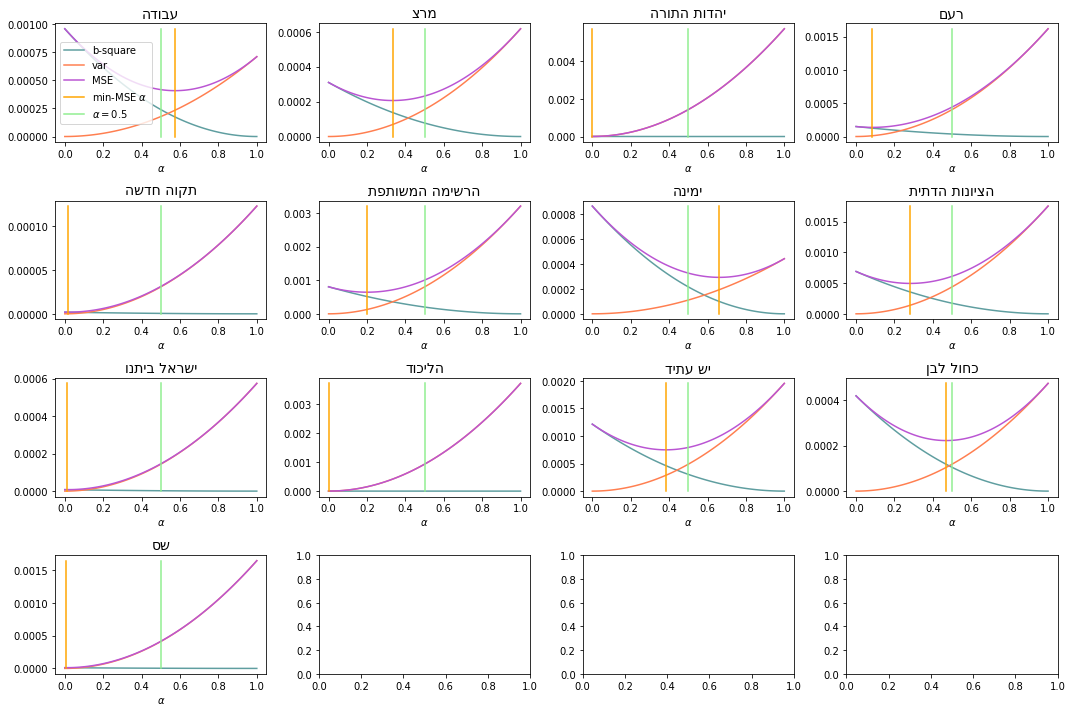

In [ ]:
rj = votes_precentage(manipulate_df_2020_ballot, -0.1)

alpha_vector = np.array(range(101))/100 
bias_vector = rj - p

names_rev = [n[::-1] for n in rj.index]
fig, ax = plt.subplots(4, 4, figsize=(15,10))
for i in range(13):   
    b_alpha = bias_vector[i] * (1-alpha_vector)
    variance_alpha = std_mat[0,i]**2 * alpha_vector**2 
    MSE_alpha = b_alpha**2 + variance_alpha
    alphaS = bias_vector[i]**2 / (std_mat[0,i]**2 + bias_vector[i]**2)
    ax[i//4, i%4].plot(alpha_vector, b_alpha**2, color="cadetblue")
    ax[i//4, i%4].plot(alpha_vector, variance_alpha, color="coral")
    ax[i//4, i%4].plot(alpha_vector, MSE_alpha, color="mediumorchid")
    ax[i//4, i%4].plot([alphaS, alphaS], [0,max(MSE_alpha)], color="orange")
    ax[i//4, i%4].plot([0.5, 0.5], [0,max(MSE_alpha)], color="lightgreen")
    ax[i//4, i%4].set_title(names_rev[i], fontsize=14)
    ax[i//4, i%4].set_xlabel(r"$\alpha$")
    if i == 0:
        ax[i//4, i%4].legend(("b-square", "var", "MSE",r"min-MSE $\alpha$",r"$\alpha = 0.5$"))
fig.tight_layout() 
plt.show()



אנחנו יכולים לראות מהגרף שעבור כל המפלגות השגיאה הריבועית הממוצעת באלפא שווה חצי נמוכה יותר מהשגיאה הריבועית הממוצעת כאשר אלפא שווה ל-1. בגלל שהעקומה בגרף המייצגת את השגיאה הריבועית הממוצעת היא קו עולה או פרבולה מחייכת אנחנו יכולים לראות זאת בבירור. 
בנוסף עולה שאלה האם יש ערך אחר של אלפא אשר יהיה קבוע לכל המפלגות אשר עדיף להשתמש בו, אז מבחינת המפלגות המפלגות היחידות שבהן השגיאה הריבועית הממוצעת גדולה מחצי הן העבודה וימינה ולכן ניתן להשתמש באלפא שווה 0.45 כי הוא מקטין עוד יותר את השגיאה הריבועית הממוצעת. 